In [218]:
#Imports:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.calibration import label_binarize
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm



In [219]:
#Lets read the DDBB:
dataBase = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
dataBase.info()
print(dataBase.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
Name       

Tenim 16719 files, i 16 columnes. Com veiem, moltes de les columnes tenen variables nul·les per exemple la més significativa és la de **User_Count** que conté més del 50% de dades nul·les.
Per treure aquestes dades contaminades farem el següent:

In [220]:
dataBase = dataBase.dropna()
dataBase.info()
print(dataBase.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB
Name      

Veiem que l'extensió del dataset és molt més petit d'aquesta forma, encara que hauriem de fer més transformacions primer mirarem com està la correl·lació ara mateix.

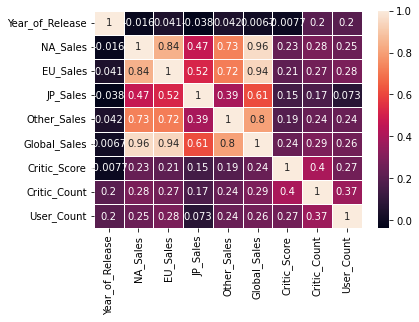

In [221]:
corr = dataBase.corr()
plt.figure()
hm = sns.heatmap(corr, annot=True, linewidths=.5)

La pregunta ara és: Per què atributs com Name o User_Score no surten? Perquè com podem veure més adalt, **no són de tipus object**, per tal de convertir-los farem lo següent:

In [222]:


nameCopy = dataBase.copy()
transform = list()

for column in nameCopy.columns:
    if column != "Name":
        transform.append(column)

nameCopy.drop(transform, axis="columns", inplace=True)

platformCopy = dataBase.copy()
transform = list()

for column in platformCopy.columns:
    if column != "Platform":
        transform.append(column)

platformCopy.drop(transform, axis="columns", inplace=True)

genreCopy = dataBase.copy()
transform = list()

for column in genreCopy.columns:
    if column != "Genre":
        transform.append(column)

genreCopy.drop(transform, axis="columns", inplace=True)

publishCopy = dataBase.copy()
transform = list()

for column in publishCopy.columns:
    if column != "Publisher":
        transform.append(column)

publishCopy.drop(transform, axis="columns", inplace=True)

userScoreCopy = dataBase.copy()
transform = list()

for column in userScoreCopy.columns:
    if column != "User_Score":
        transform.append(column)

userScoreCopy.drop(transform, axis="columns", inplace=True)

developerCopy = dataBase.copy()
transform = list()

for column in developerCopy.columns:
    if column != "User_Score":
        transform.append(column)

developerCopy.drop(transform, axis="columns", inplace=True)

ratingCopy = dataBase.copy()
transform = list()

for column in ratingCopy.columns:
    if column != "User_Score":
        transform.append(column)

ratingCopy.drop(transform, axis="columns", inplace=True)

encoder = OrdinalEncoder()
encoder.fit(nameCopy)
encoder.categories_
Name = encoder.transform(nameCopy)

encoder = OrdinalEncoder()
encoder.fit(platformCopy)
encoder.categories_
Platform = encoder.transform(platformCopy)

encoder = OrdinalEncoder()
encoder.fit(genreCopy)
encoder.categories_
Genre = encoder.transform(genreCopy)

encoder = OrdinalEncoder()
encoder.fit(publishCopy)
encoder.categories_
Publisher = encoder.transform(publishCopy)

encoder = OrdinalEncoder()
encoder.fit(userScoreCopy)
encoder.categories_
User_Score = encoder.transform(userScoreCopy)

encoder = OrdinalEncoder()
encoder.fit(developerCopy)
encoder.categories_
Developer = encoder.transform(developerCopy)


encoder = OrdinalEncoder()
encoder.fit(ratingCopy)
encoder.categories_
Rating = encoder.transform(ratingCopy)


dataBase["Name"] = Name
dataBase["Platform"] = Platform
dataBase["Genre"] = Genre
dataBase["Publisher"] = Publisher
dataBase["User_Score"] = User_Score
dataBase["Developer"] = Developer
dataBase["Rating"] = Rating

dataBase.info()

dataBase



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   float64
 1   Platform         6825 non-null   float64
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   float64
 4   Publisher        6825 non-null   float64
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   float64
 15  Rating           6825 non-null   float64
dtypes: float64(16)
memory usage: 906.4 KB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,4215.0,12.0,2006.0,10.0,160.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,72.0,322.0,72.0,72.0
2,2087.0,12.0,2008.0,6.0,160.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,75.0,709.0,75.0,75.0
3,4217.0,12.0,2009.0,10.0,160.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,72.0,192.0,72.0,72.0
6,2567.0,2.0,2006.0,4.0,160.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,77.0,431.0,77.0,77.0
7,4213.0,12.0,2006.0,3.0,160.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,58.0,129.0,58.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,1048.0,3.0,2001.0,0.0,158.0,0.01,0.00,0.00,0.00,0.01,46.0,4.0,16.0,21.0,16.0,16.0
16677,2297.0,3.0,2002.0,2.0,146.0,0.01,0.00,0.00,0.00,0.01,81.0,12.0,80.0,9.0,80.0,80.0
16696,2194.0,5.0,2014.0,0.0,123.0,0.00,0.01,0.00,0.00,0.01,80.0,20.0,68.0,412.0,68.0,68.0
16700,407.0,5.0,2011.0,8.0,53.0,0.01,0.00,0.00,0.00,0.01,61.0,12.0,50.0,43.0,50.0,50.0


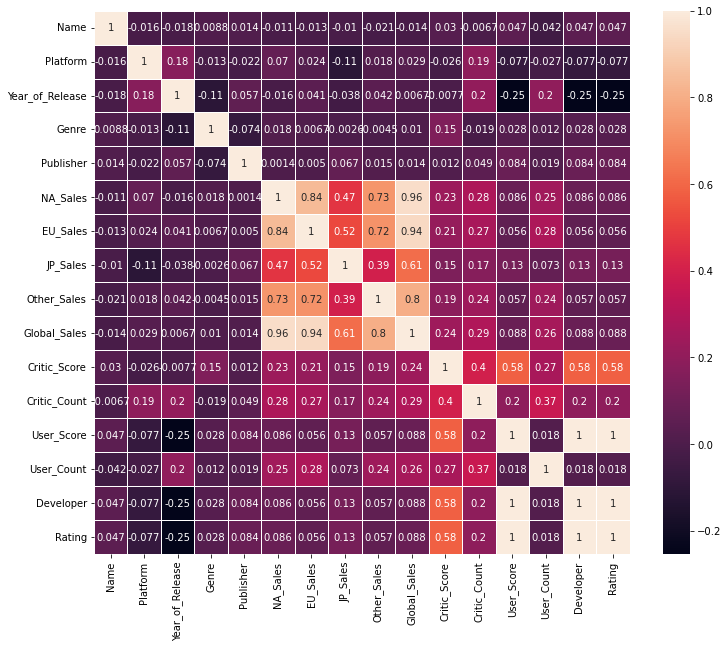

In [223]:
corr = dataBase.corr()
plt.figure(figsize=(12,10))
hm = sns.heatmap(corr, annot=True, linewidths=.5)

Jo, per aquesta pràctica he escollit predir el **Rating** tenint en compte les variables **NA_Sales**, **JP_Sales** i **Critic_Score** com veiem, la variable **Critic_Score** sí té correlació amb el **Rating** (0.58) però els atributs **NA_Sales** i **JP_Sales** no gaire (0,086 i 0.13), però penso que serà una variable interessant, perquè jo al menys penso que si un videojoc té més vendes, probablement tindrà més rating.
 Aquesta pràctica pot servir-me per entendre millor la relació entre aquestes variables.

Per fer més fàcil la predicció, dividiré l'atribut **Rating** en 4 quartils.

In [224]:
for column in dataBase.columns:
    if column == "Rating":
        dataBase[column] = pd.cut(dataBase[column].values, 4, labels = ["Bad", "Mid", "Nice", "Excelent"])

dataBase
dataBase["Rating"].value_counts()

Excelent    3569
Nice        2566
Mid          571
Bad          119
Name: Rating, dtype: int64

Aqui veiem com el rang 0, implicaria els jocs que tenen molt mal ràting.

El rang 1 implicaria que el seu ràting és normal.

El rang 2 implicaria que el seu ràting és bó.

El rang 3 implicaria que el seu ràting és molt bó o excelent.


In [225]:
dataBaseCopy = dataBase.copy()

trans = list()

for column in dataBaseCopy.columns:
    if column != "NA_Sales" and column != "JP_Sales" and column != "Critic_Score" and column != "Rating":
        trans.append(column)

dataBaseCopy.drop(trans, axis="columns",inplace=True)

data = dataBaseCopy.values

X = data[:, :-1]
y = data[:, -1]

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
print(X_train)
print(y_train)

[[0.25 0.22 68.0]
 [0.99 0.0 75.0]
 [0.73 0.0 64.0]
 ...
 [0.05 0.04 59.0]
 [0.08 0.0 38.0]
 [0.96 0.0 63.0]]
['Excelent' 'Excelent' 'Excelent' ... 'Nice' 'Mid' 'Excelent']


In [227]:
standarizer = StandardScaler().fit(X_train)

X_train = standarizer.transform(X_train)
X_test = standarizer.transform(X_test)

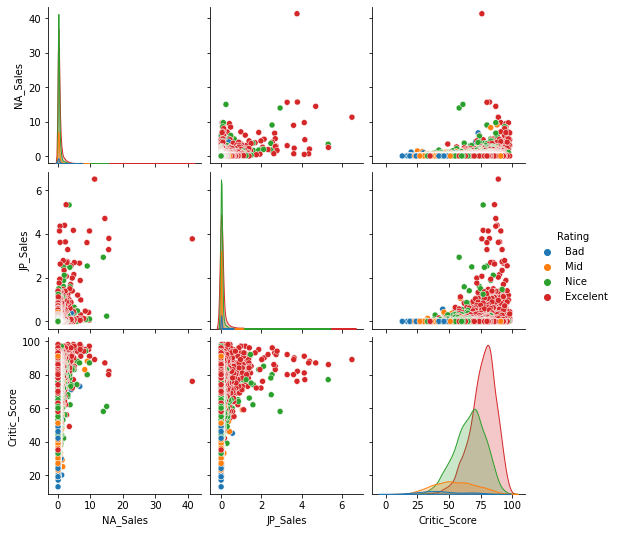

In [228]:
sns.pairplot(dataBaseCopy, hue="Rating")

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

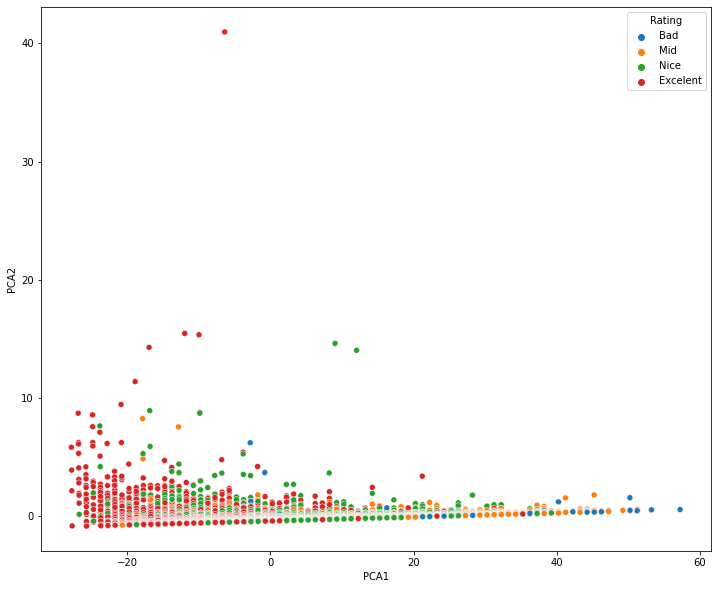

In [229]:
dataBaseCopy2 = dataBaseCopy.copy()
trans = list()

for column in dataBaseCopy2.columns:
    if column == "Rating":
        trans.append(column)

dataBaseCopy2.drop(trans, axis="columns",inplace=True)

pca21 = PCA(n_components=2, random_state=42)
pca22 = pca21.fit_transform(dataBaseCopy2[dataBaseCopy2.columns])

dataFrame2 = pd.DataFrame({"PCA1" : pca22[:,0],
                           "PCA2" : pca22[:,1], 
                           "Rating" : dataBaseCopy["Rating"]})

pca21.explained_variance_ratio_
pca21.explained_variance_ratio_.sum()

plt.figure(figsize=(12,10))

sns.scatterplot(x="PCA1", y="PCA2", hue="Rating", data=dataFrame2)

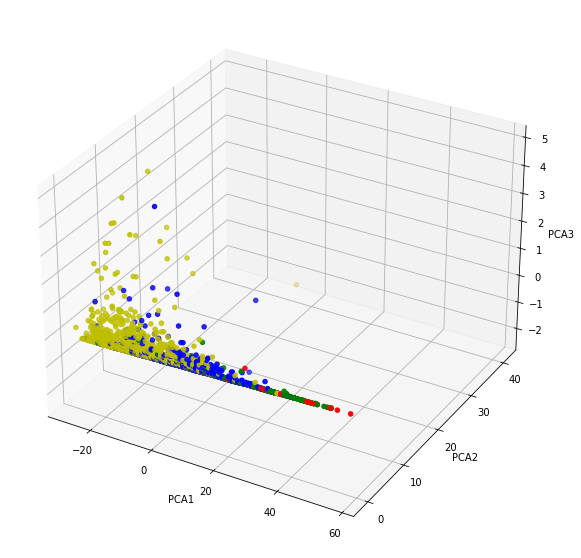

[[-1.63680487e-02 -3.06574657e-03 -9.99861334e-01]
 [ 9.89230514e-01  1.45417002e-01 -1.66398923e-02]
 [-1.45447851e-01  9.89365704e-01 -6.52537471e-04]]


In [230]:
dataBaseCopy3 = dataBaseCopy.copy()
trans = list()
for f in dataBaseCopy3.columns:
    if f == 'Rating':
        trans.append(f)
        
dataBaseCopy3.drop(trans, axis='columns', inplace=True)

pca31 = PCA(n_components=3, random_state=42)
pca32 = pca31.fit_transform(dataBaseCopy3[dataBaseCopy3.columns])

#pca32[:]

dataFrame3 = pd.DataFrame({'PCA1' : pca32[:,0], 'PCA2' : pca32[:,1], 
                     'PCA3' : pca32[:,2], 'Rating': dataBaseCopy['Rating']})

pca31.explained_variance_ratio_

pca31.explained_variance_ratio_.sum()

fig = plt.figure(figsize=(12,10))

plot = fig.add_subplot(111, projection='3d')

x = dataFrame3['PCA1']
y = dataFrame3['PCA2']
z = dataFrame3['PCA3']

col = dataFrame3['Rating'].map(
    {'Bad':'r', 'Mid':'g', 'Nice':'b', 'Excelent':'y'})

plot.scatter(x,y,z, c=col, marker='o')

plot.set_xlabel('PCA1')
plot.set_ylabel('PCA2')
plot.set_zlabel('PCA3')

plt.show()

print(pca31.components_)

Com veiem al gràfic (encara que ja ho vèiem a la matriu de correlació) està molt clar que quan PCA1 puja, el **Rating** també, i com veiem a la matriu d'adalt, PCA1 està quasi totalment representada per **Critic_Score**, de tal forma veiem que PCA2 varia bastant encara que el Rating no tant donat a que està quasi totalment representada per **JP_Sales** i pasa igual amb PCA3 que està quasi totalement representada per **NA_Sales**.

Una vegada vist que les classes no són linealment separables, utilitzarem algoritmes no lineals per tal de predir el **Rating**. Per aquesta pràctica utilitzaré els algoritmes: KNN, SVM i Decision Tree.

## Entrenament i Testing

## KNN

([<matplotlib.axis.XTick at 0x1d6c87fdf40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

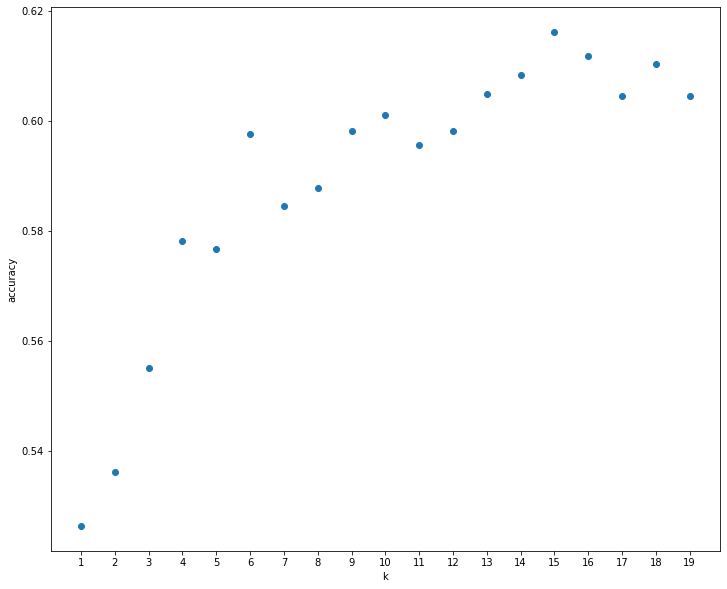

In [231]:
k_range = range(1,20)
score = list()

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))

plt.figure(figsize=(12,10))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range, score)
plt.xticks(k_range)

Veiem que la *K* amb més accuracy és la 15, per tant escollirem aquesta per ajustar el model. Després farem la k-fold cross validation per cercar la millor *K*

k = 2, 0.6161 accuracy, deviation 0.0033
k = 3, 0.6075 accuracy, deviation 0.0060
k = 4, 0.6123 accuracy, deviation 0.0033
k = 5, 0.6131 accuracy, deviation 0.0072
k = 6, 0.6102 accuracy, deviation 0.0104
k = 7, 0.6054 accuracy, deviation 0.0084
k = 8, 0.6121 accuracy, deviation 0.0164
k = 9, 0.6092 accuracy, deviation 0.0150
k = 10, 0.6050 accuracy, deviation 0.0170
k = 11, 0.6052 accuracy, deviation 0.0172
k = 12, 0.6044 accuracy, deviation 0.0191
k = 13, 0.6048 accuracy, deviation 0.0264
k = 14, 0.6087 accuracy, deviation 0.0206
k = 15, 0.6075 accuracy, deviation 0.0236
k = 16, 0.6085 accuracy, deviation 0.0199
k = 17, 0.6018 accuracy, deviation 0.0223
k = 18, 0.6085 accuracy, deviation 0.0165
k = 19, 0.6081 accuracy, deviation 0.0240


([<matplotlib.axis.XTick at 0x1d6c88bb9d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

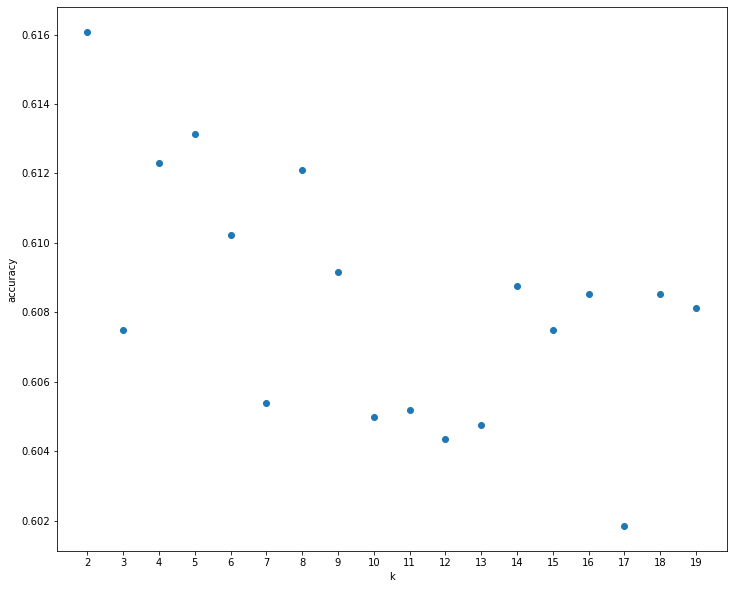

In [232]:
knn = KNeighborsClassifier(n_neighbors=15)
score = list()
k_range = range(2,20)

for k in k_range:
    s = cross_val_score(knn, X_train, y_train, cv=k, scoring="accuracy")
    score.append(s.mean())
    print("k = %d, %0.4f accuracy, deviation %0.4f" % (k, s.mean(), s.std()))

plt.figure(figsize=(12,10))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range, score)
plt.xticks(k_range)

Veiem que la millor *K* és la 2:

Metrics: 
               precision    recall  f1-score   support

         Bad       0.50      0.03      0.05        39
    Excelent       0.67      0.78      0.72      1065
         Mid       0.43      0.25      0.31       169
        Nice       0.54      0.51      0.53       775

    accuracy                           0.62      2048
   macro avg       0.54      0.39      0.40      2048
weighted avg       0.60      0.62      0.60      2048



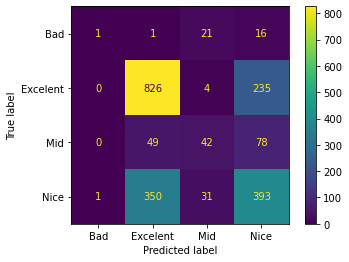

In [233]:
cross_val_score(knn, X_train,  y_train, cv=2, scoring="accuracy")

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Metrics: \n", metrics.classification_report(y_test, y_pred))

metrics.plot_confusion_matrix(knn, X_test, y_test)

Primer de tot, m'agradaria comentar que el número de mostres és inferior al que hauria de ser, sincerament no se perquè però jo crec que el número de encerts més el número de errades al predir Bad hauria de ser igual al número de files que tenen com a rating Bad, però és bastant menor.

Igualment, considero que és una part suficientment substancial de les dades com per considerar-la representativa. Com veiem el què millor ha predit és els videojocs amb **Rating** Excelent, i el que pitjor els videojocs amb **Rating** Mid, tot això ho podem veure entre la matriu de confusió i la taula de precisió, recall i f1-score d'adalt.

Mostraré apart les corves ROC a continuació:

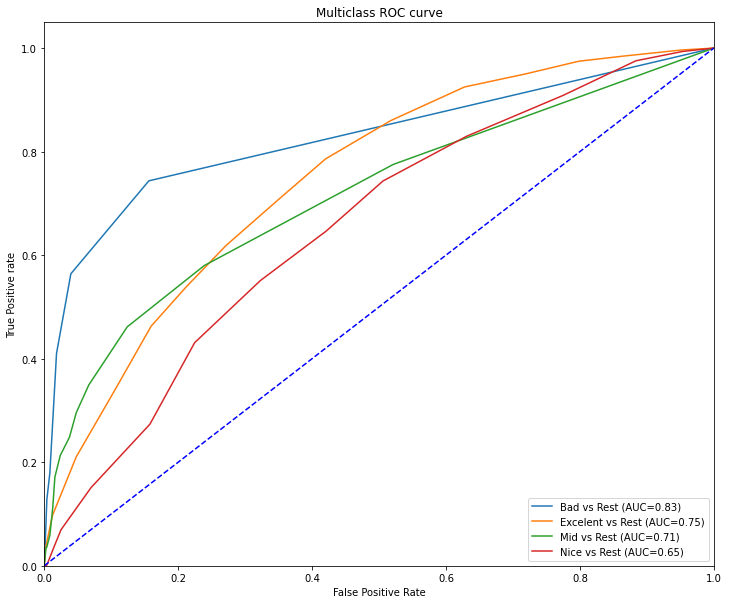

In [234]:
pred = knn.predict_proba(X_test)

plt.figure(figsize=(12,10))

y_testBin = label_binarize(y_test, classes=np.unique(y_test))

fpr = {}
tpr = {} 
thresh = {}

roc_auc = dict()

classes = np.unique(y_test)
nClass = classes.shape[0]

for i in range(nClass):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_testBin[:,i], pred[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='-', label="%s vs Rest (AUC=%0.2f)"%(classes[i], roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

En la gràfica veiem que el model està ben entrenat sobretoto per a les categories *Bad* i *Excelent*, però en general és pot millorar totes. Igualment com el rendiment és decent, no modificarem res.

## Decision Tree

k = 2, 0.5326 accuracy, deviation 0.0032
k = 3, 0.5323 accuracy, deviation 0.0101
k = 4, 0.5384 accuracy, deviation 0.0194
k = 5, 0.5392 accuracy, deviation 0.0175
k = 6, 0.5311 accuracy, deviation 0.0199
k = 7, 0.5403 accuracy, deviation 0.0246
k = 8, 0.5321 accuracy, deviation 0.0249
k = 9, 0.5304 accuracy, deviation 0.0195
k = 10, 0.5367 accuracy, deviation 0.0215
k = 11, 0.5313 accuracy, deviation 0.0301
k = 12, 0.5353 accuracy, deviation 0.0245
k = 13, 0.5409 accuracy, deviation 0.0329
k = 14, 0.5357 accuracy, deviation 0.0317
k = 15, 0.5405 accuracy, deviation 0.0363
k = 16, 0.5359 accuracy, deviation 0.0258
k = 17, 0.5386 accuracy, deviation 0.0275
k = 18, 0.5321 accuracy, deviation 0.0293
k = 19, 0.5405 accuracy, deviation 0.0383


([<matplotlib.axis.XTick at 0x1d6c9762250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

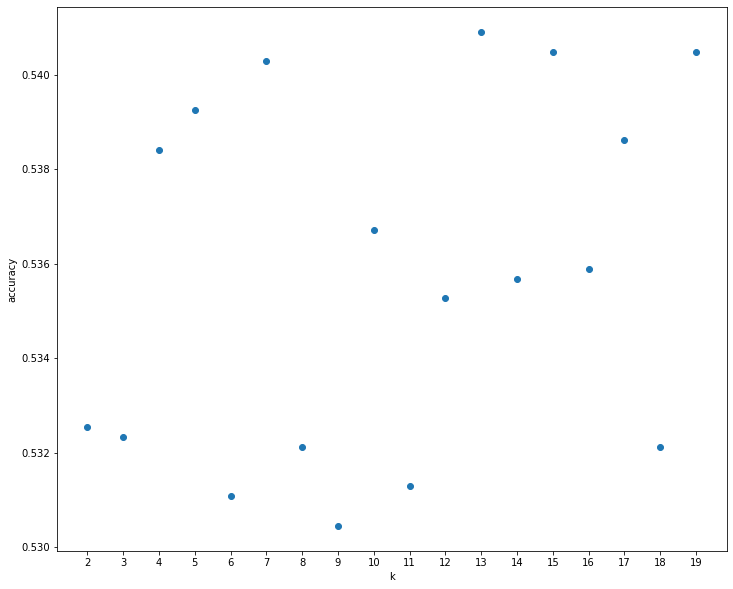

In [235]:
DecisionTree = DecisionTreeClassifier(random_state=42)

score = list()
k_range = range(2,20)

for k in k_range:
    s = cross_val_score(DecisionTree, X_train, y_train, cv=k, scoring="accuracy")
    score.append(s.mean())
    print("k = %d, %0.4f accuracy, deviation %0.4f" % (k, s.mean(), s.std()))

plt.figure(figsize=(12,10))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range, score)
plt.xticks(k_range)

Com veiem, la millor *K* és la 13:

Metrics: 
               precision    recall  f1-score   support

         Bad       0.16      0.15      0.16        39
    Excelent       0.63      0.70      0.66      1065
         Mid       0.24      0.23      0.23       169
        Nice       0.46      0.40      0.43       775

    accuracy                           0.54      2048
   macro avg       0.37      0.37      0.37      2048
weighted avg       0.53      0.54      0.53      2048



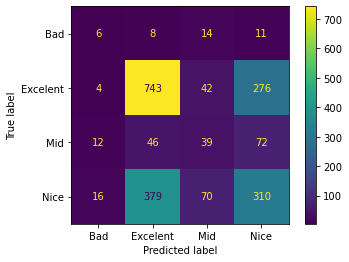

In [236]:
cross_val_score(DecisionTree, X_train, y_train, cv=13, scoring='accuracy')

DecisionTree = DecisionTree.fit(X_train, y_train)

y_pred = DecisionTree.predict(X_test)

print("Metrics: \n", metrics.classification_report(y_test, y_pred))

metrics.plot_confusion_matrix(DecisionTree, X_test, y_test)

Veiem que les prediccions sobretot de *Bad* i *Mid* són bastant errònies, amb un 0.16 i un 0.24 de precisió. També m'he donat compte fent proves, que modificant el valor de **cv** no es modifica la precisió, això pot significar que el model és estable, o que tenim suficients dades com perquè això no ens afecti. Igualment mostraré les corves ROC:

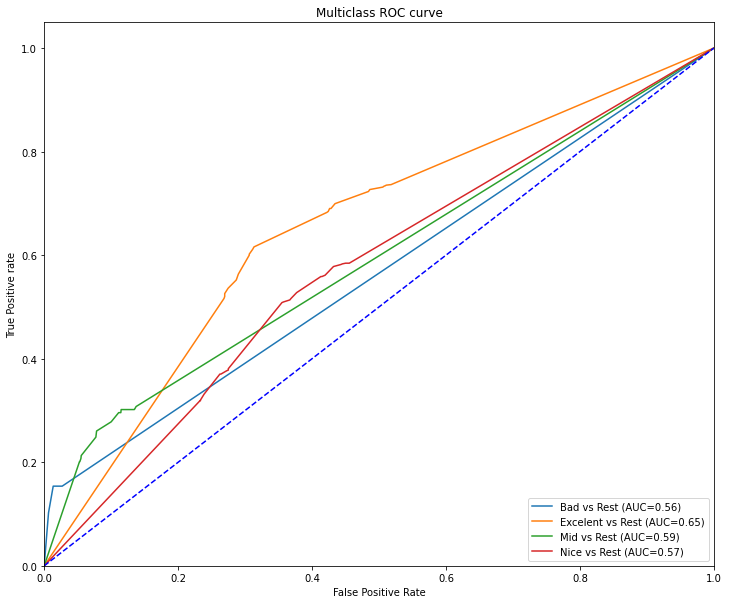

In [237]:
pred = DecisionTree.predict_proba(X_test)

plt.figure(figsize=(12,10))

y_testBin = label_binarize(y_test, classes=np.unique(y_test))

fpr = {}
tpr = {} 
thresh = {}

roc_auc = dict()

classes = np.unique(y_test)
nClass = classes.shape[0]

for i in range(nClass):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_testBin[:,i], pred[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='-', label="%s vs Rest (AUC=%0.2f)"%(classes[i], roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

A la gràfica veiem que tot el model podria millorar bastant, però igualment no modificarem res.

## SVM

In [238]:
grid_hp = {"C" : [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10]}

grid_search = GridSearchCV(estimator= svm.SVC(kernel="linear", random_state=0),
                           param_grid=grid_hp,
                           cv=5,
                           scoring="accuracy",
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=0), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7,
                               10]},
             scoring='accuracy')

k = 2, 0.6154 accuracy, deviation 0.0005
k = 3, 0.6163 accuracy, deviation 0.0065
k = 4, 0.6171 accuracy, deviation 0.0066
k = 5, 0.6175 accuracy, deviation 0.0040
k = 6, 0.6178 accuracy, deviation 0.0174
k = 7, 0.6180 accuracy, deviation 0.0094
k = 8, 0.6180 accuracy, deviation 0.0127
k = 9, 0.6188 accuracy, deviation 0.0189
k = 10, 0.6180 accuracy, deviation 0.0158
k = 11, 0.6186 accuracy, deviation 0.0148
k = 12, 0.6180 accuracy, deviation 0.0190
k = 13, 0.6180 accuracy, deviation 0.0255
k = 14, 0.6178 accuracy, deviation 0.0163
k = 15, 0.6178 accuracy, deviation 0.0217
k = 16, 0.6188 accuracy, deviation 0.0234
k = 17, 0.6178 accuracy, deviation 0.0212
k = 18, 0.6180 accuracy, deviation 0.0238
k = 19, 0.6173 accuracy, deviation 0.0321


([<matplotlib.axis.XTick at 0x1d6c99c6310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

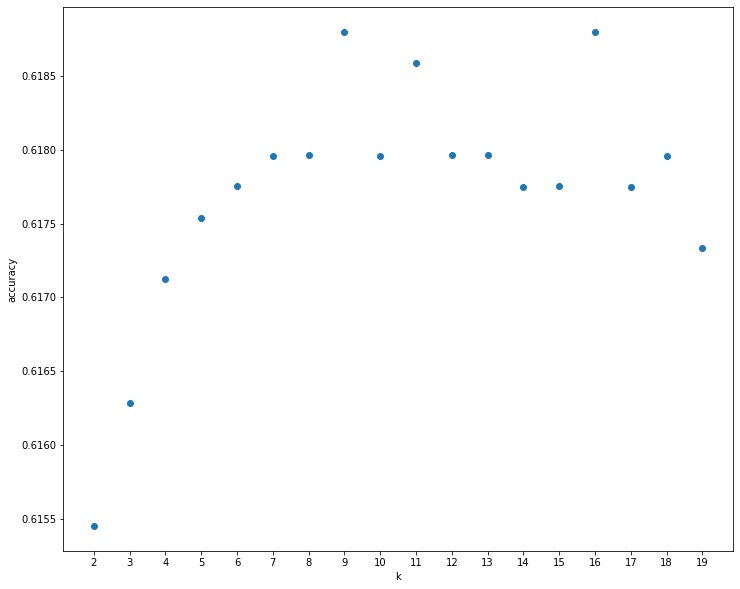

In [239]:
svmLineal = svm.SVC(kernel="linear",
                    C=grid_search.best_params_.get("C"),
                    random_state=0,
                    probability=True)

score = list()
k_range = range(2,20)

for k in k_range:
    s = cross_val_score(svmLineal, X_train, y_train, cv=k, scoring="accuracy")
    score.append(s.mean())
    print("k = %d, %0.4f accuracy, deviation %0.4f" % (k, s.mean(), s.std()))

plt.figure(figsize=(12,10))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range, score)
plt.xticks(k_range)

La millor *K* és 9 per la desviació, així que anem a entrenar-ho.

c:\Users\gordi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gordi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gordi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics: 
               precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        39
    Excelent       0.67      0.86      0.75      1065
         Mid       0.00      0.00      0.00       169
        Nice       0.54      0.47      0.50       775

    accuracy                           0.62      2048
   macro avg       0.30      0.33      0.31      2048
weighted avg       0.55      0.62      0.58      2048



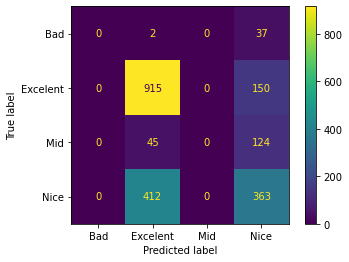

In [240]:
cross_val_score(svmLineal, X_train, y_train, cv=9, scoring='accuracy')

svmLineal.fit(X_train, y_train)

y_pred = svmLineal.predict(X_test)

print("Metrics: \n", metrics.classification_report(y_test, y_pred))

metrics.plot_confusion_matrix(svmLineal, X_test, y_test)

Com amb aquest kernel, no ens predeix els atributs *Bad* i *Mid* anem a probar amb un altre kernel.

In [241]:
grid_hp = {"C" : [0.001, 0.01, 0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 7, 10]}

grid_search = GridSearchCV(estimator= svm.SVC(kernel="poly", random_state=0),
                           param_grid=grid_hp,
                           cv=5,
                           scoring="accuracy",
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

svmPoly = svm.SVC(kernel="poly",
                    C=grid_search.best_params_.get("C"),
                    random_state=0,
                    probability=True)

score = list()
k_range = range(2,20)
"""
Comento esto dado al tiempo que tarda en ejecutarse, he comprobado que la mejor K es 3.

for k in k_range:
    s = cross_val_score(svmPoly, X_train, y_train, cv=k, scoring="accuracy")
    score.append(s.mean())
    print("k = %d, %0.4f accuracy, deviation %0.4f" % (k, s.mean(), s.std()))

plt.figure(figsize=(12,10))
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range, score)
plt.xticks(k_range)
"""

'\nComento esto dado al tiempo que tarda en ejecutarse, he comprobado que la mejor K es 3.\n\nfor k in k_range:\n    s = cross_val_score(svmPoly, X_train, y_train, cv=k, scoring="accuracy")\n    score.append(s.mean())\n    print("k = %d, %0.4f accuracy, deviation %0.4f" % (k, s.mean(), s.std()))\n\nplt.figure(figsize=(12,10))\nplt.xlabel("k")\nplt.ylabel("accuracy")\nplt.scatter(k_range, score)\nplt.xticks(k_range)\n'

Encara que no es vegi, la millor *K* és 3, per tant entrenarem amb això.

Metrics: 
               precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        39
    Excelent       0.58      0.98      0.73      1065
         Mid       0.49      0.13      0.21       169
        Nice       0.54      0.15      0.23       775

    accuracy                           0.58      2048
   macro avg       0.40      0.31      0.29      2048
weighted avg       0.55      0.58      0.49      2048



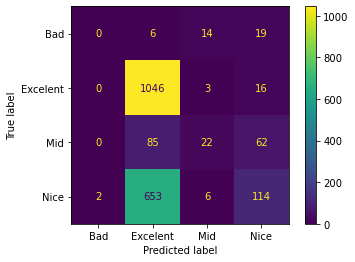

In [242]:
cross_val_score(svmPoly, X_train, y_train, cv=3, scoring='accuracy')

svmPoly.fit(X_train, y_train)

y_pred = svmPoly.predict(X_test)

print("Metrics: \n", metrics.classification_report(y_test, y_pred))

metrics.plot_confusion_matrix(svmPoly, X_test, y_test)


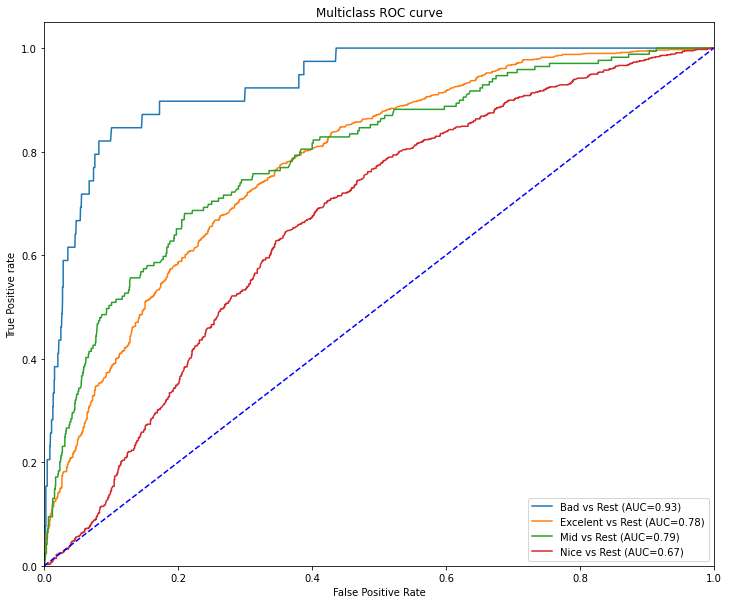

In [243]:
pred = svmPoly.predict_proba(X_test)

plt.figure(figsize=(12,10))

y_testBin = label_binarize(y_test, classes=np.unique(y_test))

fpr = {}
tpr = {} 
thresh = {}

roc_auc = dict()

classes = np.unique(y_test)
nClass = classes.shape[0]

for i in range(nClass):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_testBin[:,i], pred[:,i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='-', label="%s vs Rest (AUC=%0.2f)"%(classes[i], roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

Ara veiem que encara que no ens ha pogut predir ningun atribut *Bad* al menys sí tenim mostres de *Mid*. Podem veure que la precisió ha pujat, encara que solament hagi sigut per els encerts a *Mid*. Ara podriem probar amb el **SVM Radial**, pero donat a que aquest model ha trigat més d'una hora en executar-se (I no s'ha executat sencer), m'abstendre donat a que no crec que variin molt els resultats.

M'agradaria comentar, abans de passar a les conclusions, que una possible causa a aquestes errades amb les prediccions, pot deures a que les dades no són balancejades, els atributs *Mid* i *Bad* tenen menys mostres que els *Excelent* i *Nice*. Per tant això pot estar afectant a l'algorisme de SVM. 

M'agradaria poder probar la meva teoria, però per falta de temps (I pel que triga a executar-se) no podrà ser possible.

## Conclusions

Podem veure que el que millor accurracy té és el KNN amb un 54%, tot i que fent les millores que he comentat, el SVM tant Lineal com Polinomial podrien superar-lo.